In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
import pandas as pd

style.use('default')
import matplotlib.path as mpath

from IPython.display import Image

coldwater species = above 40° latitude

In [2]:
df = pd.read_csv('Chl_C_ratios_v2.csv')

In [3]:
df

,PFT_group,study,species,isolate_location,gChl/gC,notes
0,diat,Lomas et al. 2019,Attheya septentrionalis,"Baffin Bay (77.8N, 76.4W), N. Atlantic Ocean",0.1300,NaN
1,diat,Lomas et al. 2019,Skeletonema dohrni,"Kasitsna Bay (59.5N, 151.4W), Alaska",0.0400,NaN
2,diat,Lomas et al. 2019,Porosira glacialis,"Narragansett Bay (41.6N, 71.4W), Rhode Island",0.0610,NaN
3,diat,Lomas et al. 2019,Melosira nummuloides,"Harwich Harbor (41.7N, 70W), Massachusetts",0.0400,NaN
4,diat,Lomas et al. 2019,Odontella aurita,"Webb Cove 44.2N, 69.5W), Stonington, Maine",0.0530,NaN
5,diat,Lomas et al. 2019,Thalassiosira antarctica,"Oslo Fjord (59.5N, −10.6W), Norway",0.0550,NaN
6,diat,Lomas et al. 2019,Thalassiosira nordenskioeldii,"Tromsø (69.7N, −18.7W), Norway",0.0730,NaN
7,diat,Lomas et al. 2019,Thalassiosira aestivalis,"North Atlantic Ocean (42.7N, 69.6W)",0.0430,NaN
8,diat,Lomas et al. 2019,Thalassiosira gravida,"Tromsø (59.5N, −10.6W), Norway",0.0610,NaN
9,diat,"Geider et al. 1997,Yoder 1979",Skeletonema costatum,"Narragansett Bay (41.6N, 71.4W), Rhode Island",0.0470,NaN


### CESM diat gChl/gC:
#### diat: 0.046
#### sp: 0.028

In [4]:
selection_diat = df[(df['PFT_group'] =='diat')]
selection_diat['gChl/gC'].mean()

0.05138636363636366

In [5]:
selection_sp = df[(df['PFT_group'] =='sp')]
selection_sp['gChl/gC'].mean()

0.022363636363636363

### make a bar plot

In [6]:
species_diat = np.asarray(selection_diat.species)
species_sp = np.asarray(selection_sp.species)
#species_diat

In [7]:
ratio_diat = np.asarray(selection_diat['gChl/gC'])
ratio_sp = np.asarray(selection_sp['gChl/gC'])
#ratio_diat

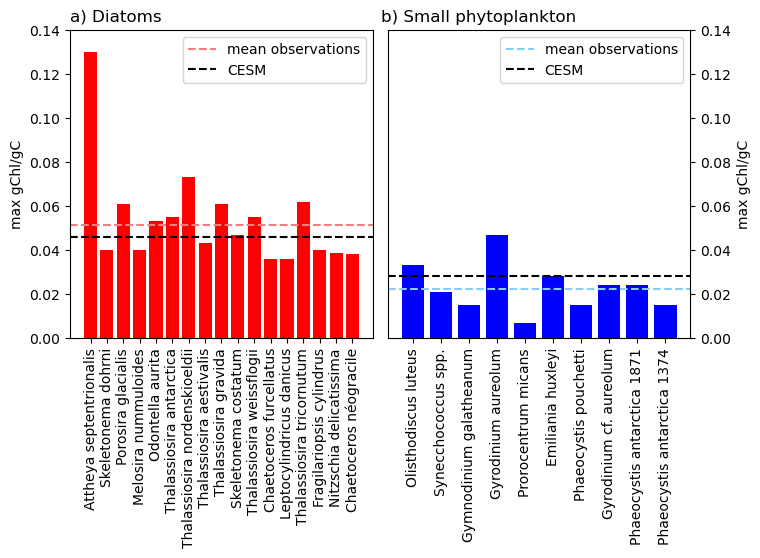

In [8]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)
ax.set_ylim(0,0.14)
ax.set_title('a) Diatoms', x=0.15)
ax.bar(species_diat,ratio_diat, color='red')
ax.set_ylabel('max gChl/gC')
ax.tick_params(axis='x', labelrotation = 90)
plt.axhline(y=selection_diat['gChl/gC'].mean(), color='lightcoral', linestyle='--',label='mean observations')
plt.axhline(y=0.046, color='black', linestyle='--', label='CESM')
ax.legend()

ax = fig.add_subplot(1,2,2)
ax.set_ylim(0,0.14)
ax.set_title('b) Small phytoplankton',x=0.3)
ax.bar(species_sp,ratio_sp, color='blue')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('max gChl/gC')
plt.axhline(y=selection_sp['gChl/gC'].mean(), color='lightskyblue', linestyle='--',label='mean observations')
plt.axhline(y=0.028, color='black', linestyle='--', label='CESM')
ax.yaxis.set_label_position("right")
ax.legend()
ax.yaxis.tick_right();

fig.subplots_adjust(wspace=0.05)

fig.savefig('/glade/work/kristenk/figs/max_theta-sp-diat.png', bbox_inches='tight', dpi=300, format='png');

In [9]:
selection_diat

,PFT_group,study,species,isolate_location,gChl/gC,notes
0,diat,Lomas et al. 2019,Attheya septentrionalis,"Baffin Bay (77.8N, 76.4W), N. Atlantic Ocean",0.1300,NaN
1,diat,Lomas et al. 2019,Skeletonema dohrni,"Kasitsna Bay (59.5N, 151.4W), Alaska",0.0400,NaN
2,diat,Lomas et al. 2019,Porosira glacialis,"Narragansett Bay (41.6N, 71.4W), Rhode Island",0.0610,NaN
3,diat,Lomas et al. 2019,Melosira nummuloides,"Harwich Harbor (41.7N, 70W), Massachusetts",0.0400,NaN
4,diat,Lomas et al. 2019,Odontella aurita,"Webb Cove 44.2N, 69.5W), Stonington, Maine",0.0530,NaN
5,diat,Lomas et al. 2019,Thalassiosira antarctica,"Oslo Fjord (59.5N, −10.6W), Norway",0.0550,NaN
6,diat,Lomas et al. 2019,Thalassiosira nordenskioeldii,"Tromsø (69.7N, −18.7W), Norway",0.0730,NaN
7,diat,Lomas et al. 2019,Thalassiosira aestivalis,"North Atlantic Ocean (42.7N, 69.6W)",0.0430,NaN
8,diat,Lomas et al. 2019,Thalassiosira gravida,"Tromsø (59.5N, −10.6W), Norway",0.0610,NaN
9,diat,"Geider et al. 1997,Yoder 1979",Skeletonema costatum,"Narragansett Bay (41.6N, 71.4W), Rhode Island",0.0470,NaN


In [10]:
selection_sp

,PFT_group,study,species,isolate_location,gChl/gC,notes
10,sp,"Geider et al. 1997,Langdon 1987",Olisthodiscus luteus,"Narragansett Bay (41.6N, 71.4W), Rhode Island",0.033,"found in Lacour et al., 2016"
12,sp,"Geider et al. 1997,Kana & Gilbert 1987",Synecchococcus spp.,33 44.9’N 67 29.8’W,0.021,isolate location found in Chadd et al 1996
13,sp,"Geider et al. 1997,Nielsen 1996",Gymnodinium galatheanum,"Olsofjord, Norway",0.015,NaN
14,sp,"Geider et al. 1997,Nielsen 1992",Gyrodinium aureolum,"Olsofjord, Norway",0.047,NaN
15,sp,"Geider et al. 1997,Falkowski et al. 1985",Prorocentrum micans,unknown; Long Island Sounds,0.007,NaN
17,sp,"Geider et al. 1997,Muggali & Harrison 1997",Emiliania huxleyi,"Subarctic North Pacific, Station P",0.017,NaN
18,sp,Verity et al. 1991,Phaeocystis pouchetti,"Tromso, Norway",0.015,largest value reported among solitary & colonies
23,sp,Nielsen 1997,Emiliania huxleyi,"Plymouth Marine Laboratory, UK",0.028,found in Lacour et al. 2016
24,sp,Garcia & Prudie 1992,Gyrodinium cf. aureolum,English Channel,0.024,dinoflagellate
25,sp,Arrigo et al. 2010,Phaeocystis antarctica 1871,Southern Ocean,0.024,NaN


In [11]:
species_diat

array(['Attheya septentrionalis', 'Skeletonema dohrni',
       'Porosira glacialis', 'Melosira nummuloides', 'Odontella aurita',
       'Thalassiosira antarctica', 'Thalassiosira nordenskioeldii',
       'Thalassiosira aestivalis', 'Thalassiosira gravida',
       'Skeletonema costatum', 'Skeletonema costatum',
       'Thalassiosira weissflogii', 'Thalassiosira nordenskioeldii',
       'Chaetoceros furcellatus', 'Leptocylindricus danicus',
       'Thalassiosira tricornutum', 'Fragilariopsis cylindrus',
       'Chaetoceros furcellatus', 'Thalassiosira antarctica',
       'Nitzschia delicatissima', 'Chaetoceros néogracile',
       'Thalassiosira gravida'], dtype=object)

In [12]:
species_diat2 = ['Attheya septentrionalis$^1$', 'Skeletonema dohrni$^1$',
       'Porosira glacialis$^1$', 'Melosira nummuloides$^1$', 'Odontella aurita$^1$',
       'Thalassiosira antarctica$^1$', 'Thalassiosira nordenskioeldii$^1$',
       'Thalassiosira aestivalis$^1$', 'Thalassiosira gravida$^1$',
       'Skeletonema costatum$^2$', 'Skeletonema costatum$^3$',
       'Thalassiosira weissflogii$^4$', 'Thalassiosira nordenskioeldii$^5$',
       'Chaetoceros furcellatus$^5$', 
       'Leptocylindricus danicus$^6$', 'Thalassiosira tricornutum$^7$',
       'Fragilariopsis cylindrus$^8$', 'Chaetoceros furcellatus$^{9}$',
       'Thalassiosira antarctica$^{9}$', 'Nitzschia delicatissima$^{9}$',
       'Chaetoceros néogracile$^{10}$', 'Thalassiosira gravida$^{10}$']

In [14]:
species_sp2 =['Olisthodiscus luteus$^3$', 'Synecchococcus spp.$^{11}$',
       'Gymnodinium galatheanum$^{12}$', 'Gyrodinium aureolum$^{13}$',
       'Prorocentrum micans$^{4}$', 'Emiliania huxleyi$^{14}$',
       'Phaeocystis pouchetti$^{15}$', 'Emiliania huxleyi$^{16}$',
       'Gyrodinium cf. aureolum$^{17}$', 'Phaeocystis antarctica 1871$^{8}$',
       'Phaeocystis antarctica 1374$^{8}$']

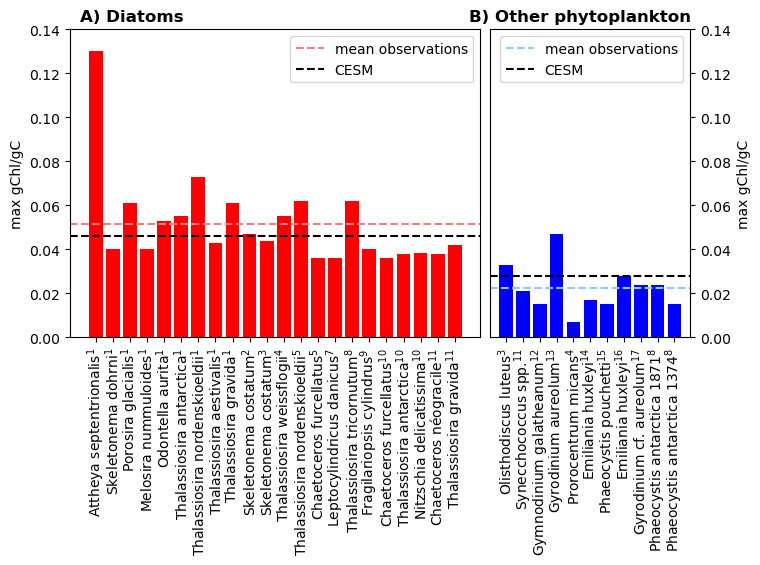

In [15]:
fig = plt.figure(constrained_layout=True,figsize=(8,4))
ax = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(ax[0:2])
ax1.set_ylim(0,0.14)
ax1.set_title('A) Diatoms', x=0.15,fontweight='bold')
ax1.bar(species_diat2,ratio_diat, color='red')
ax1.set_ylabel('max gChl/gC')
ax1.tick_params(axis='x', labelrotation = 90)
plt.axhline(y=selection_diat['gChl/gC'].mean(), color='lightcoral', linestyle='--',label='mean observations')
plt.axhline(y=0.046, color='black', linestyle='--', label='CESM')
ax1.legend()
plt.xticks(fontsize=10)

ax2 = fig.add_subplot(ax[2:3])
ax2.set_ylim(0,0.14)
ax2.set_title('B) Other phytoplankton',x=0.45,fontweight='bold')
ax2.bar(species_sp2,ratio_sp, color='blue')
ax2.tick_params(axis='x', labelrotation = 90)
ax2.set_ylabel('max gChl/gC')
plt.axhline(y=selection_sp['gChl/gC'].mean(), color='lightskyblue', linestyle='--',label='mean observations')
plt.axhline(y=0.028, color='black', linestyle='--', label='CESM')
ax2.yaxis.set_label_position("right")
ax2.legend()
ax2.yaxis.tick_right();
plt.xticks(fontsize=10)

# plt.rcParams.update(fontparams)

fig.subplots_adjust(wspace=0.05)
fig.savefig('/glade/work/kristenk/figs/Chl_to_C_ratio_SIfig.png', bbox_inches='tight', dpi=300, format='png');